In [1]:
import os
import shutil


In [2]:
original_dataset_dir = 'E:/Data/train/'


In [3]:
base_dir = 'E:/Data/cats_and_dogs/'


In [4]:
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


In [ ]:
os.mkdir(train_dir)

os.mkdir(validation_dir)

os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')


In [7]:
os.mkdir(train_cats_dir)

os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)

os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)

os.mkdir(test_dogs_dir)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'E:/Data/cats_and_dogs/train\\cats'

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1001, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1501, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [8]:
print('Total training cats images : ', len(os.listdir(train_cats_dir)))
print('Total training dogs images : ', len(os.listdir(train_dogs_dir)))
print('')

print('Total Validation cats images :', len(os.listdir(validation_cats_dir)))
print('Total Validation dogs images :', len(os.listdir(validation_dogs_dir)))
print('')

print('Total test cats images : ', len(os.listdir(test_cats_dir)))
print('Total test dogs images : ', len(os.listdir(test_dogs_dir)))


Total training cats images :  1000
Total training dogs images :  1000

Total Validation cats images : 499
Total Validation dogs images : 500

Total test cats images :  499
Total test dogs images :  500


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [13]:
# Understanding Python Generator

def generator():
    i = 0
    while True:
        i += 1
        yield i


for item in generator():
    print(item)
    if item > 4:
        break


1
2
3
4
5


In [14]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape : ', data_batch.shape)
    print('Data labels shape : ', labels_batch.shape)
    break


Data batch shape :  (20, 150, 150, 3)
Data labels shape :  (20,)


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_772\1573792142.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 134s 1s/step - loss: 0.6878 - acc: 0.5495 - val_loss: 0.6683 - val_acc: 0.6266
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.6602 - acc: 0.6050 - val_loss: 0.6461 - val_acc: 0.6076
Epoch 3/30
100/100 [==============================] - 112s 1s/step - loss: 0.6145 - acc: 0.6645 - val_loss: 0.6256 - val_acc: 0.6346
Epoch 4/30
100/100 [==============================] - 114s 1s/step - loss: 0.5704 - acc: 0.7000 - val_loss: 0.6066 - val_acc: 0.6667
Epoch 5/30
100/100 [==============================] - 114s 1s/step - loss: 0.5375 - acc: 0.7340 - val_loss: 0.5773 - val_acc: 0.6807
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.5083 - acc: 0.7420 - val_loss: 0.6420 - val_acc: 0.6416
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 0.4774 - acc: 0.7710 - val_loss: 0.5596 - val_acc: 0.7097
Epoch 8/30
100/100 [==============================] - 110s 1s/step - 

In [16]:
model.save('cats_and_dogs_small_1.h5')


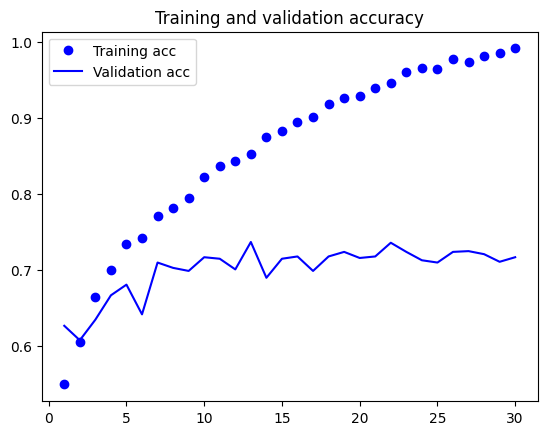

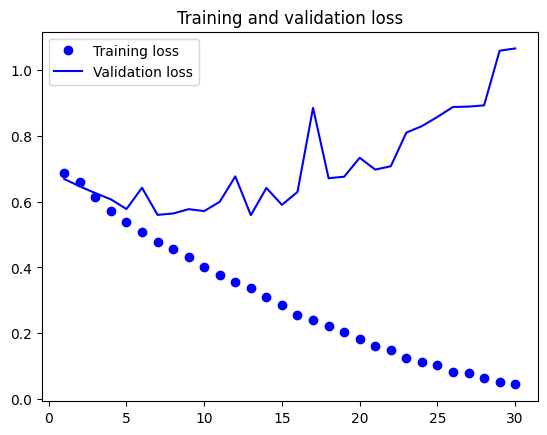

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [18]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [21]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
          for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'